In [16]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 57252109810477858
 xla_global_id: -1]

In [17]:
from __future__ import print_function
import tensorflow.keras
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

In [18]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Veriden örnekleri görselleştirme

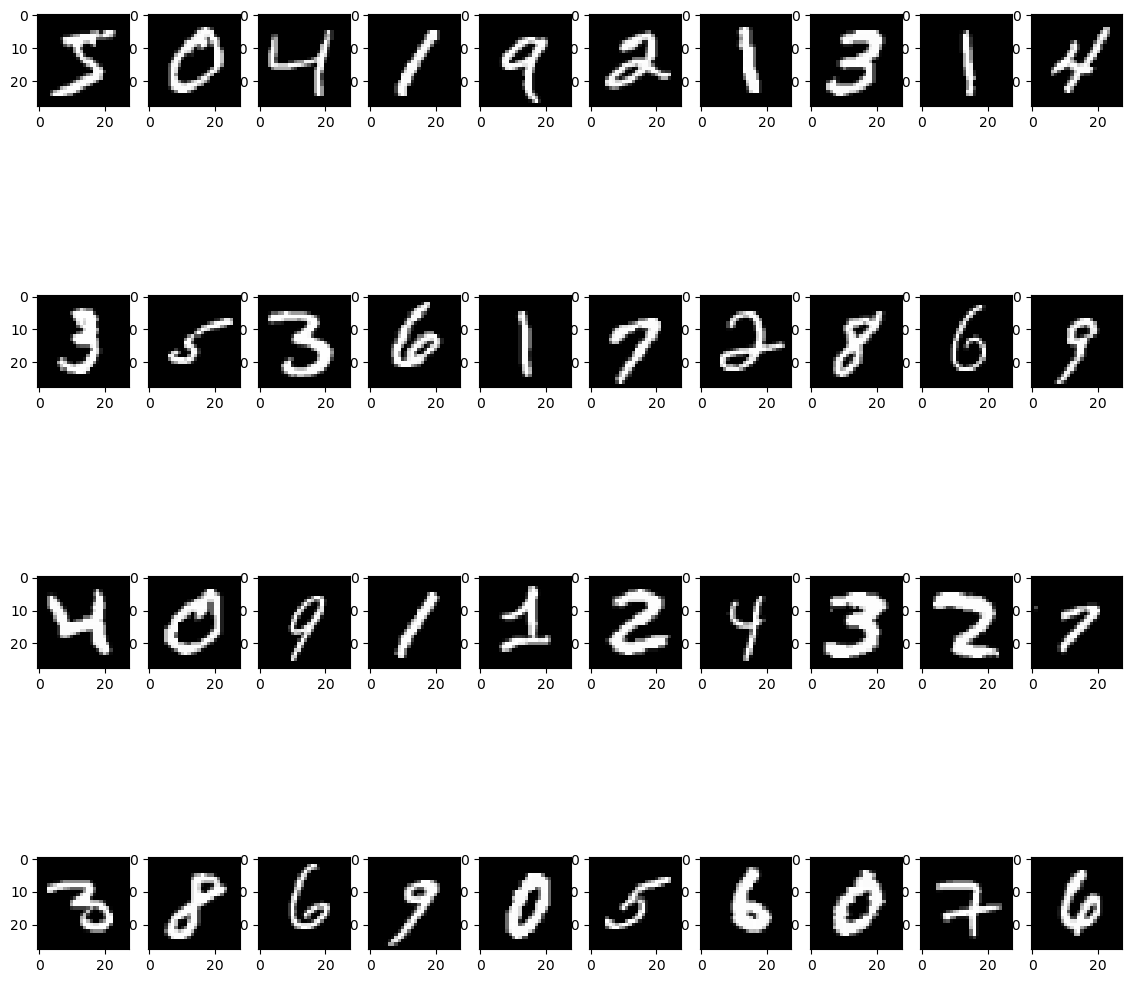

In [19]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [20]:
batch_size = 128 
num_classes = 10 # 0-9 arası rakamlar
epochs = 8 # 12 epoch önerilir

img_rows, img_cols = 28, 28


if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
     

In [21]:
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

#Bu kod, veri setinizin hedef değişkenlerini (etiketlerini) one-hot encoding olarak kodlamak için kullanılır.
#Genellikle çok sınıflı sınıflandırma problemlerinde kullanılır.
#Verilen sınıf sayısı (num_classes) için her bir örneğin sınıfını bir vektör olarak temsil eder.
#Örneğin, eğer num_classes 4 ise ve bir örnek 3. sınıfa aitse, bu örnek için [0, 0, 1, 0] olacaktır.

Model Oluşturma

In [22]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape)) #Evrişim katmanı

 
model.add(Conv2D(64, (3, 3), activation='relu'))#Evrişim Katmanı


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))


model.add(Flatten())#Düzleştirme Katmanı


model.add(Dense(128, activation='relu'))#Yoğun Katman (Tam Bağlantı)

model.add(Dropout(0.5))


model.add(Dense(num_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [24]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy,
             optimizer = tensorflow.keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

Eğitim İşlemleri

In [25]:
model.fit(X_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1, #"verbose" argümanı modelin eğitimi sırasında ne kadar bilgi görüleceğini belirler(0,1,2)
         validation_data=(X_test,y_test)) 
         

Epoch 1/8
469/469 [==============================] - 46s 96ms/step - loss: 26.1778 - accuracy: 0.1616 - val_loss: 4.4716 - val_accuracy: 0.4197
Epoch 2/8
469/469 [==============================] - 47s 99ms/step - loss: 11.4198 - accuracy: 0.2690 - val_loss: 1.9691 - val_accuracy: 0.5592
Epoch 3/8
469/469 [==============================] - 46s 98ms/step - loss: 6.0690 - accuracy: 0.3250 - val_loss: 1.3771 - val_accuracy: 0.5578
Epoch 4/8
469/469 [==============================] - 46s 98ms/step - loss: 3.6975 - accuracy: 0.3416 - val_loss: 1.4323 - val_accuracy: 0.5120
Epoch 5/8
469/469 [==============================] - 46s 98ms/step - loss: 2.6800 - accuracy: 0.3391 - val_loss: 1.5618 - val_accuracy: 0.4699
Epoch 6/8
469/469 [==============================] - 46s 98ms/step - loss: 2.2709 - accuracy: 0.3422 - val_loss: 1.6064 - val_accuracy: 0.4666
Epoch 7/8
469/469 [==============================] - 48s 103ms/step - loss: 2.0890 - accuracy: 0.3502 - val_loss: 1.5817 - val_accuracy: 0.4

In [57]:
model.save('mnist_model.hdf5')

In [58]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

Test Loss: 1.5172176361083984
Test Accuracy: 0.512499988079071


Rastgele Değer için Test İşlemi

In [59]:
model_test = model.save('save_models/mnist_model.hdf5')

In [72]:
test_image = X_test[128]
y_test[128]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

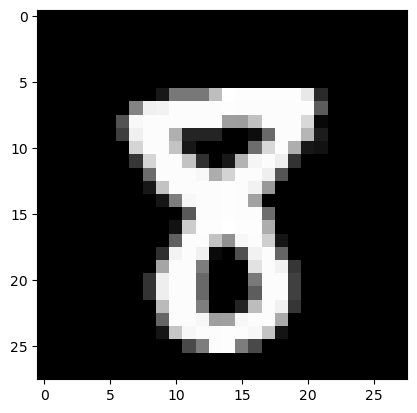

In [73]:
plt.imshow(test_image.reshape(28,28), cmap='gray', vmin=2, vmax=255)

In [76]:
# 3 değeri için 3'e karşılık gelen 4.dizin 1

In [77]:
model_test = load_model('save_models/mnist_model.hdf5')
#test_data = X_test[128].reshape(1,28,28,1)
#pre = model_test.predict(test_data, batch_size=1)

In [79]:
#preds = model_test.predict_classes(test_data) //  Eski kullanım. Yeni kullanımı aşağıdaki gibi. 
#preds = model_test.predict(test_data)
#prob = model_test.predict_proba(test_data) //  Eski kullanım. Yeni kullanımı aşağıdaki gibi.
#prob = model_test.predict(test_data)
#print(preds,prob)